In [3]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [5]:
# Load the dataset
absolute_path = (str(os.path.abspath('')))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

c:\Users\jordy\Data science\DSopdrachten\Datasets/UniversalBank.csv


In [7]:
#let's pick the same target we used for our logistic regression in faze 1
target = ['CreditCard']
predictors = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']


In [9]:
#I ahve read onlien that standardization is not needed for decision trees, so let's experiment a bit :)
#let's split up the data into training and test sets.
x = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()



In [10]:
#Let's train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
#Making some predictions
y_pred_clf = clf.predict(X_test)

In [12]:
#Evaluating
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.635


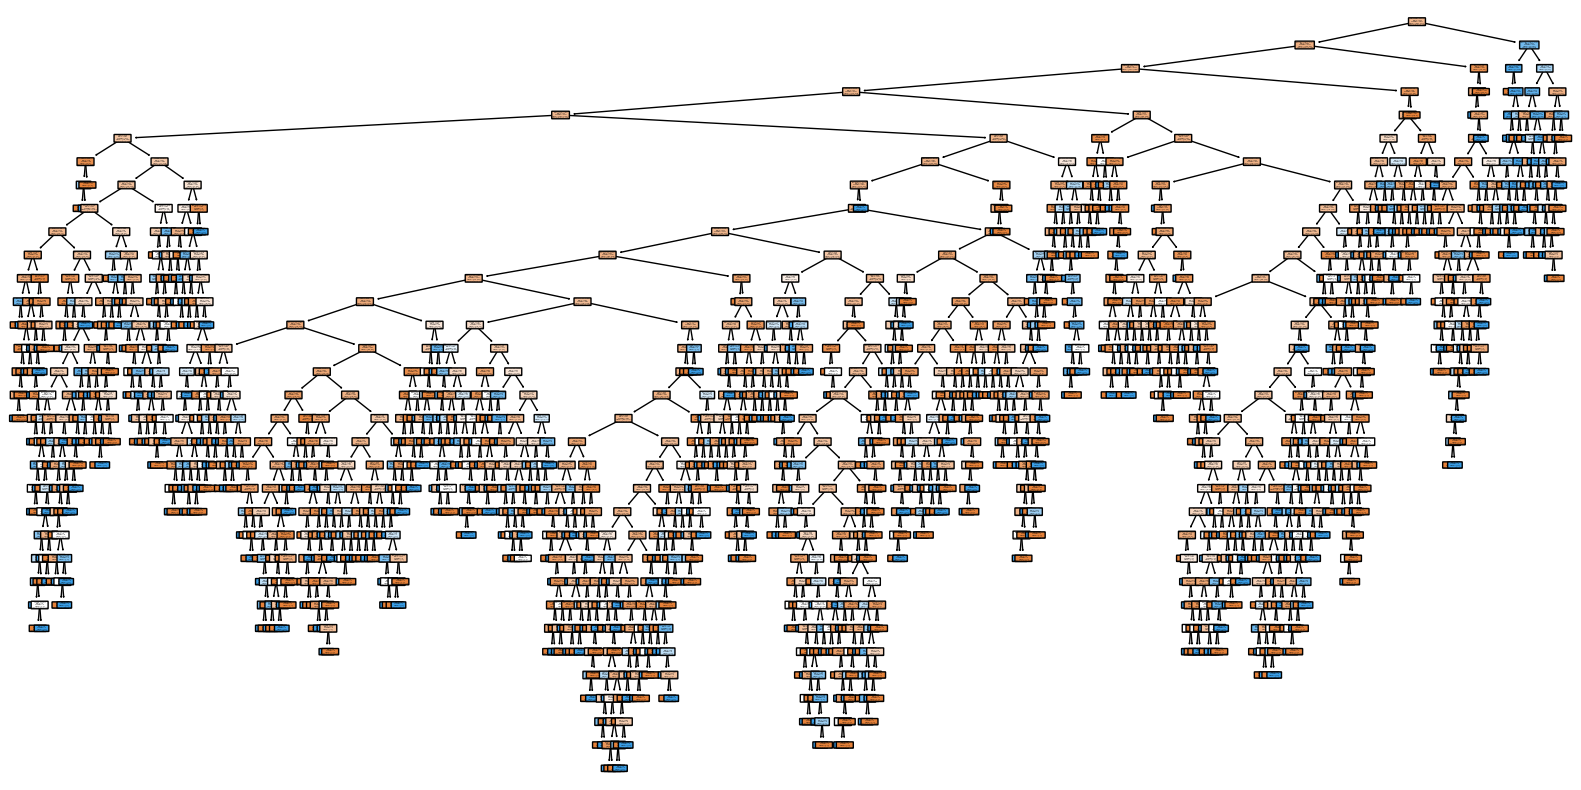

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Let's visualize the tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=predictors, class_names=['No Credit Card', 'Credit Card'], filled=True, rounded=True)
plt.show()

In [27]:
#An accuracy of 0.635 is not that great, especially since we managed to achieve higher with Logistic Regression. So there is definitely room for improvement
#Let's see what the impact of a standardized dataset is.
from sklearn.discriminant_analysis import StandardScaler


numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[list(numerical_columns)])
df_cleaned = df.drop(columns=['ID'])
target = ['CreditCard']
predictors = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']
x = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.636


In [28]:
#What I've read online seems to be correct, standardizing the dataframe has non-significant impact on the accuracy,
#Let's look for other ways to improve the accuracy.
#Let's see what happens when we use the same predictors as we used for the optimal logistic regression model
target = ['CreditCard']
predictors = ['Income', 'Family', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account, Online']
x = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.636


In [29]:
#That did not have any impact, let's try a different approach
#Let's try a technique called hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
y_pred_clf = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Improved Classification Accuracy: {accuracy}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation accuracy: 0.72375
Improved Classification Accuracy: 0.722


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy: 0.7260000000000001
Improved Classification Accuracy: 0.721
Feature names: ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']
Class names: [0 1]


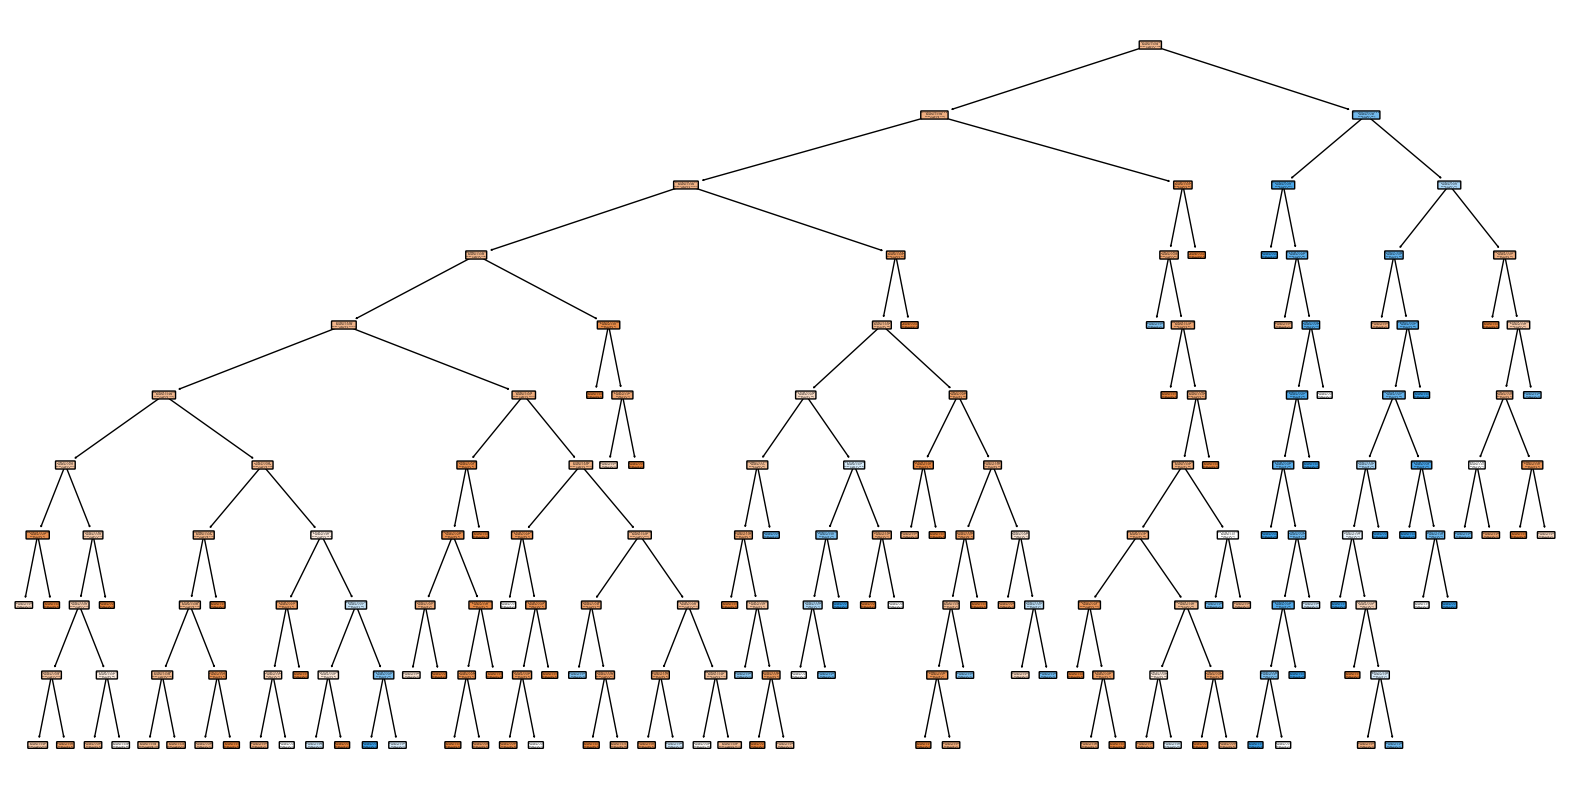

In [34]:
#Now that we have found the optimal hyperparameters, let's implement it into the model and visualize our new tree
# Define target and predictors
target = ['CreditCard']
predictors = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']

# Split the data into training and test sets
X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Use the best parameters to create a new model
best_params = grid_search.best_params_
best_clf = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the best model to the training data
best_clf.fit(X_train, y_train)

# Make predictions with the best model
y_pred_clf = best_clf.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Improved Classification Accuracy: {accuracy}")

# Verify feature names and class names
print(f"Feature names: {predictors}")
print(f"Class names: {np.unique(y_train)}")

# Visualize the decision tree with the best parameters
plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=predictors, class_names=['0', '1'], filled=True, rounded=True)
plt.show()